# 2장 - 간단한 분류 알고리즘 훈련

In [71]:
# google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# 작업할 폴더 위치 설정 (본인 폴더 경로에 맞게 수정필요)
colab_path = "/content/drive/MyDrive/MachineLearning/6wk/실습"

In [73]:
from IPython.display import Image

## 2.1 인공 뉴런: 초기 머신 러닝의 간단한 역사

In [74]:
Image(url='https://git.io/JtIbf', width=500)

- 1943년 워렌 맥컬록(Warren McCulloch)과 월터 피츠(Walter Pitts)가 맥컬록-피츠(MCP) 뉴런 발표
- 프랑크 로젠블라트(Frank Rosenblatt)는 MCP 뉴런 모델을 기반으로 퍼셉트론 학습 개념을 발표

### 2.1.1 인공 뉴런의 수학적 정의

$\boldsymbol{w}=\begin{bmatrix} w_1 \\ \vdots \\ w_m\end{bmatrix}$ ,
$\boldsymbol{x}=\begin{bmatrix} x_1 \\ \vdots \\ x_m\end{bmatrix}$

최종 입력(net input) : $z = w_1x_1+w_2x_2+\cdots+w_mx_m$


벡터 점곱(dot product), 행렬 곱셈(matrix multiplication) :
$\begin{bmatrix}1&2&3\end{bmatrix}\times\begin{bmatrix}4\\5\\6\end{bmatrix}=1\times4+2\times5+3\times6=32$

점곱을 사용한 표현 : $z = w_1x_1+\cdots+w_mx_m=\sum_{j=1}^mx_jw_j=\boldsymbol{w}^T\boldsymbol{x}$

퍼셉트론의 결정 함수 : $\phi(z)=\begin{cases}1&z\ge\theta\mbox{ 일 때} \\ -1&\mbox{그 외}\end{cases}$
$\;\;\;\;\;$
$\phi(z)=\begin{cases}1&z-\theta\ge0\mbox{ 일 때} \\ -1&\mbox{그 외}\end{cases}$

$w_0=-\theta , x_0=1$ 일 때 : $z_{new} = w_0x_0+w_1x_1+\cdots+w_mx_m=\sum_{j=0}^mx_jw_j=\boldsymbol{w}^T\boldsymbol{x}$

In [75]:
# 퍼셉트론 결정 함수(단위 계단 함수)와 결정 경계
Image(url='https://git.io/JtIbL', width=500)

<br>

### 2.1.2 퍼셉트론 학습 규칙

$\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$

$w_j := w_j + \Delta w_j$

클래스 레이블을 정확히 예측한 경우 :

$y^{(i)}=-1,\; \hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(-1-(-1))x_j^{(i)}=0$

$y^{(i)}=1,\; \hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(1-1)x_j^{(i)}=0$

클래스 레이블을 잘못 예측한 경우 :

$y^{(i)}=1,\;\hat{y}^{(i)}=-1, \qquad \Delta w_j=\eta(1-(-1))x_j^{(i)}=\eta(2)x_j^{(i)}$

$y^{(i)}=-1,\;\hat{y}^{(i)}=1, \qquad \Delta w_j=\eta(-1-1)x_j^{(i)}=\eta(-2)x_j^{(i)}$

예를 들어 $\hat{y}^{(i)}=-1,\;y^{(i)}=+1,\;\eta=1$ 이고, $x_j^{(i)}=0.5$ 일 때 :

$\Delta w_j=(1-(-1))0.5=(2)0.5=1$

$x_j^{(i)}=2$ 일 때 :

$\Delta w_j=(1-(-1))2=(2)2=4$

In [76]:
Image(url='https://git.io/JtIbq', width=600)

In [77]:
# 퍼셉트론 알고리즘
Image(url='https://git.io/JtIbO', width=600)

## 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API

In [78]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기 구현

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        ''' 초기화 함수 구현 '''
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state


    def fit(self, X, y):
        """훈련 데이터 학습 함수 구현

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
          errors = 0
          for xi, target in zip(X,y):
            update = self.eta * (target - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
            errors += int(update != 0.0)
          self.errors_.append(errors)
        return self

    def net_input(self, X):
        """입력 계산 함수 구현"""
        return np.dot(X, self.w_[1:]) +self.w_[0]

    def predict(self, X):
        """ 에측 함수 구현"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



$\boldsymbol{w}^{(1)} = \boldsymbol{w}^{(0)}+\mathit\Delta\boldsymbol{w}=\boldsymbol{w}^{(0)}+\eta(\boldsymbol{y}-\boldsymbol{\hat{y}})\boldsymbol{x}=\eta(\boldsymbol{y}-\phi(\boldsymbol{w}^{(0)}\boldsymbol{x}))\boldsymbol{x}=\eta(\boldsymbol{y}+1)\boldsymbol{x}$

$a\cdot b =\vert a\vert\vert b\vert\text{cos}\theta$

$\theta=\text{cos}^{-1}\dfrac{a\cdot b}{\vert a\vert\vert b\vert}$

### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

### 붓꽃 데이터셋 읽기

In [79]:
# 라이브러리 import 후 iris.csv read (dataset link 사용)
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### 붓꽃 데이터 그래프 그리기

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택, 출력하여 확인
y = df.iloc[0:100, 4].values

y


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

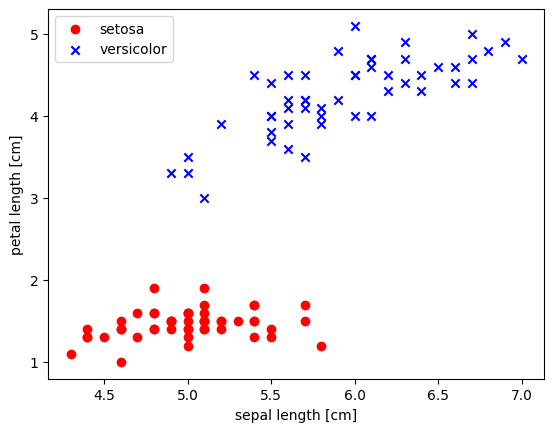

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택
y = df.iloc[0:100, 4].values

# numpy where 함수, 조건이 true -> -1 반환, false -> 1 반환
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 특징 값으로 추출
X = df.iloc[0:100, [0, 2]].values

# 산점도 출력, setosa - o versicolor - x
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()



### 퍼셉트론 모델 훈련하기

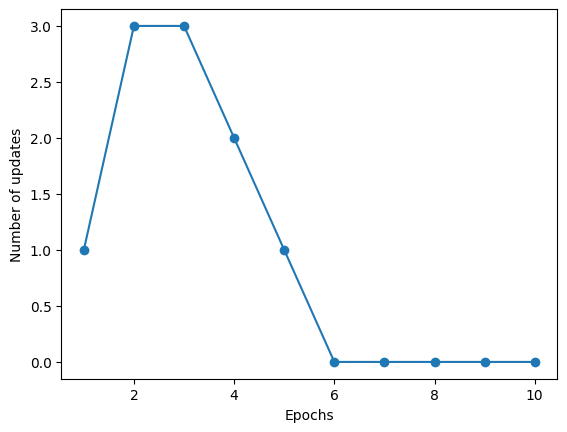

In [88]:
# Perceptron 선언 및 학습
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

# Epochs당 Number of updates 그래프 출력
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### 결정 경계 그래프 함수

In [96]:
from matplotlib.colors import ListedColormap

# 결정 경계 그래프 함수 정의
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor=None if idx ==1 else 'black')




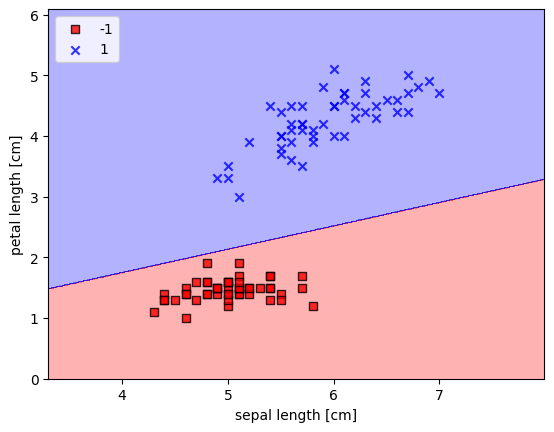

In [97]:
# 결정 경계 그래프 출력
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()